In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading dictinary from file

In [24]:
uni_dict = np.load('example_dict.npy', allow_pickle=True).item()

In [25]:
uni_dict

{'Boston': ['Northeastern University', 'Boston University'],
 'London': ['UCL',
  'Kings College',
  'Queen Mary University',
  'Royal Holloway University'],
 'Oxford': ['Oxford University']}

In [26]:
uni_dict.keys()

dict_keys(['Boston', 'London', 'Oxford'])

#### dictionary to dataframe

In [27]:
df_rows = []
for k,v in uni_dict.items():
    print('key', k)
    print('value',v)
    for vv in v:
        print('this will be a row: ',[k,vv])
        df_rows.append([k,vv])

key Boston
value ['Northeastern University', 'Boston University']
this will be a row:  ['Boston', 'Northeastern University']
this will be a row:  ['Boston', 'Boston University']
key London
value ['UCL', 'Kings College', 'Queen Mary University', 'Royal Holloway University']
this will be a row:  ['London', 'UCL']
this will be a row:  ['London', 'Kings College']
this will be a row:  ['London', 'Queen Mary University']
this will be a row:  ['London', 'Royal Holloway University']
key Oxford
value ['Oxford University']
this will be a row:  ['Oxford', 'Oxford University']


In [28]:
df_rows

[['Boston', 'Northeastern University'],
 ['Boston', 'Boston University'],
 ['London', 'UCL'],
 ['London', 'Kings College'],
 ['London', 'Queen Mary University'],
 ['London', 'Royal Holloway University'],
 ['Oxford', 'Oxford University']]

In [29]:
uni_df = pd.DataFrame(df_rows, columns=['city','university'])

In [30]:
uni_df

,city,university
0,Boston,Northeastern University
1,Boston,Boston University
2,London,UCL
3,London,Kings College
4,London,Queen Mary University
5,London,Royal Holloway University
6,Oxford,Oxford University


#### apply function to column

In [31]:
uni_df['university']

0      Northeastern University
1            Boston University
2                          UCL
3                Kings College
4        Queen Mary University
5    Royal Holloway University
6            Oxford University
Name: university, dtype: object

In [32]:
x = uni_df['university'].iloc[0]
x

'Northeastern University'

In [33]:
x.split(' ')[0]

'Northeastern'

In [34]:
uni_df['university'].apply(lambda x: x.split(' ')[0])

0    Northeastern
1          Boston
2             UCL
3           Kings
4           Queen
5           Royal
6          Oxford
Name: university, dtype: object

In [35]:
x = uni_df['university'].iloc[5]
x

'Royal Holloway University'

In [36]:
x.replace(' University','')

'Royal Holloway'

In [37]:
uni_df['university'].apply(lambda x: x.replace(' University',''))

0      Northeastern
1            Boston
2               UCL
3     Kings College
4        Queen Mary
5    Royal Holloway
6            Oxford
Name: university, dtype: object

In [38]:
uni_df

,city,university
0,Boston,Northeastern University
1,Boston,Boston University
2,London,UCL
3,London,Kings College
4,London,Queen Mary University
5,London,Royal Holloway University
6,Oxford,Oxford University


In [39]:
uni_df['univeristy_name'] = uni_df['university'].apply(lambda x: x.replace(' University',''))
uni_df

,city,university,univeristy_name
0,Boston,Northeastern University,Northeastern
1,Boston,Boston University,Boston
2,London,UCL,UCL
3,London,Kings College,Kings College
4,London,Queen Mary University,Queen Mary
5,London,Royal Holloway University,Royal Holloway
6,Oxford,Oxford University,Oxford


#### apply function to multiple columns

In [40]:
uni_df.apply(lambda x: x.city + '_' + x.university, axis=1)

0      Boston_Northeastern University
1            Boston_Boston University
2                          London_UCL
3                London_Kings College
4        London_Queen Mary University
5    London_Royal Holloway University
6            Oxford_Oxford University
dtype: object

In [41]:
uni_df['city_plus_uni'] = uni_df.apply(lambda x: x.city + '_' + x.university, axis=1)
uni_df

,city,university,univeristy_name,city_plus_uni
0,Boston,Northeastern University,Northeastern,Boston_Northeastern University
1,Boston,Boston University,Boston,Boston_Boston University
2,London,UCL,UCL,London_UCL
3,London,Kings College,Kings College,London_Kings College
4,London,Queen Mary University,Queen Mary,London_Queen Mary University
5,London,Royal Holloway University,Royal Holloway,London_Royal Holloway University
6,Oxford,Oxford University,Oxford,Oxford_Oxford University


#### merging 


In [42]:
df_x = uni_df[['city', 'university']].copy()
df_y = pd.DataFrame({'city':['London', 'Boston','New York'],
                    'country':['UK','USA','USA']})

In [43]:
df_x

,city,university
0,Boston,Northeastern University
1,Boston,Boston University
2,London,UCL
3,London,Kings College
4,London,Queen Mary University
5,London,Royal Holloway University
6,Oxford,Oxford University


In [44]:
df_y

,city,country
0,London,UK
1,Boston,USA
2,New York,USA


<img src="join.png">

In [45]:
pd.merge(df_x, df_y, how='inner')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK


In [46]:
pd.merge(df_x, df_y, how='outer')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK
6,Oxford,Oxford University,NaN
7,New York,NaN,USA


In [47]:
pd.merge(df_x, df_y, how='left')

,city,university,country
0,Boston,Northeastern University,USA
1,Boston,Boston University,USA
2,London,UCL,UK
3,London,Kings College,UK
4,London,Queen Mary University,UK
5,London,Royal Holloway University,UK
6,Oxford,Oxford University,NaN


In [48]:
pd.merge(df_x, df_y, how='right')

,city,university,country
0,London,UCL,UK
1,London,Kings College,UK
2,London,Queen Mary University,UK
3,London,Royal Holloway University,UK
4,Boston,Northeastern University,USA
5,Boston,Boston University,USA
6,New York,NaN,USA


In [49]:
df_y = pd.DataFrame({'city_name':['London', 'Boston','New York'],
                    'country':['UK','USA','USA']})

In [50]:
df_y

,city_name,country
0,London,UK
1,Boston,USA
2,New York,USA


In [51]:
pd.merge(df_x, df_y, how='left')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [52]:
uni_with_location = pd.merge(df_x, df_y, how='left', left_on='city', right_on='city_name')

In [53]:
uni_with_location

,city,university,city_name,country
0,Boston,Northeastern University,Boston,USA
1,Boston,Boston University,Boston,USA
2,London,UCL,London,UK
3,London,Kings College,London,UK
4,London,Queen Mary University,London,UK
5,London,Royal Holloway University,London,UK
6,Oxford,Oxford University,NaN,NaN


#### merging on multiple columns

In [54]:
gdp = pd.DataFrame({'city':['London','London','Boston','Boston','New York','New York'],
                    'year':[2017,2018,2017,2018,2017,2018],
                    'GDP':[1,2,3,4,5,6]})
scholarship = pd.DataFrame({'university':['Queen Mary University','Royal Holloway University','Boston University', 'Queen Mary University','Royal Holloway University','Boston University'],
                    'year':[2017,2017,2017,2018,2018,2018],
                    'scholarship_avg':[1,2,3,4,5,6]})

In [55]:
gdp

,city,year,GDP
0,London,2017,1
1,London,2018,2
2,Boston,2017,3
3,Boston,2018,4
4,New York,2017,5
5,New York,2018,6


In [56]:
scholarship

,university,year,scholarship_avg
0,Queen Mary University,2017,1
1,Royal Holloway University,2017,2
2,Boston University,2017,3
3,Queen Mary University,2018,4
4,Royal Holloway University,2018,5
5,Boston University,2018,6


In [57]:
uni_with_location

,city,university,city_name,country
0,Boston,Northeastern University,Boston,USA
1,Boston,Boston University,Boston,USA
2,London,UCL,London,UK
3,London,Kings College,London,UK
4,London,Queen Mary University,London,UK
5,London,Royal Holloway University,London,UK
6,Oxford,Oxford University,NaN,NaN


In [58]:
scholarship_with_city = pd.merge(scholarship, uni_with_location[['university','city']],
                                how='left')
scholarship_with_city

,university,year,scholarship_avg,city
0,Queen Mary University,2017,1,London
1,Royal Holloway University,2017,2,London
2,Boston University,2017,3,Boston
3,Queen Mary University,2018,4,London
4,Royal Holloway University,2018,5,London
5,Boston University,2018,6,Boston


In [59]:
scholarship_with_city_GDP = pd.merge(scholarship_with_city, gdp,
                                    how='left', on=['city','year'])
scholarship_with_city_GDP


,university,year,scholarship_avg,city,GDP
0,Queen Mary University,2017,1,London,1
1,Royal Holloway University,2017,2,London,1
2,Boston University,2017,3,Boston,3
3,Queen Mary University,2018,4,London,2
4,Royal Holloway University,2018,5,London,2
5,Boston University,2018,6,Boston,4


#### seaborn plots

In [60]:
import seaborn as sns
#https://seaborn.pydata.org/examples/index.html

<AxesSubplot:>

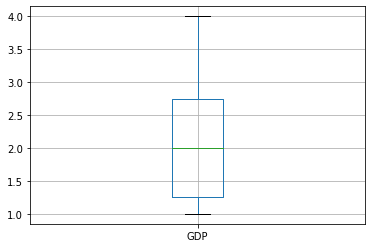

In [61]:
scholarship_with_city_GDP.boxplot('GDP')

C:\Users\Gyongyver\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='GDP'>

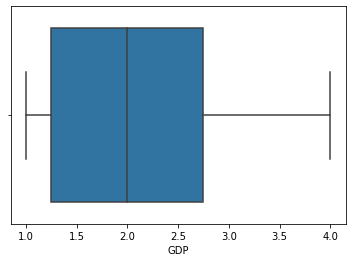

In [62]:
sns.boxplot(data=scholarship_with_city_GDP, x='GDP', orient='v')

<AxesSubplot:xlabel='city'>

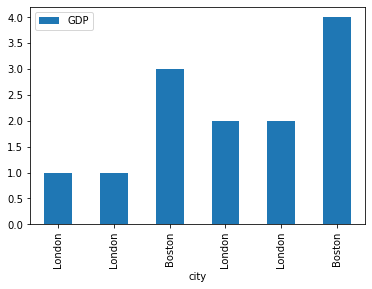

In [63]:
scholarship_with_city_GDP.plot.bar(x='city',y='GDP')

<AxesSubplot:xlabel='city', ylabel='GDP'>

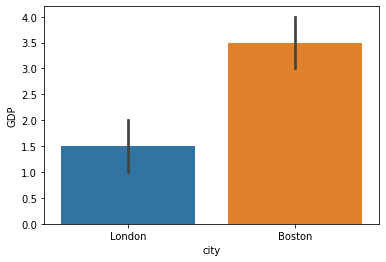

In [64]:
sns.barplot(data=scholarship_with_city_GDP, x='city', y='GDP')

array([[<AxesSubplot:title={'center':'GDP'}>]], dtype=object)

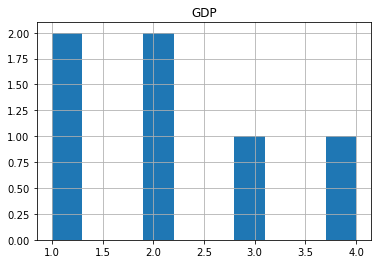

In [65]:
scholarship_with_city_GDP[['GDP']].hist()

C:\Users\Gyongyver\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

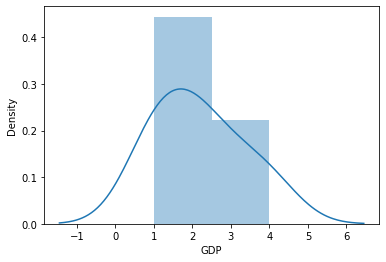

In [66]:
sns.distplot(scholarship_with_city_GDP['GDP'])

<AxesSubplot:xlabel='scholarship_avg', ylabel='GDP'>

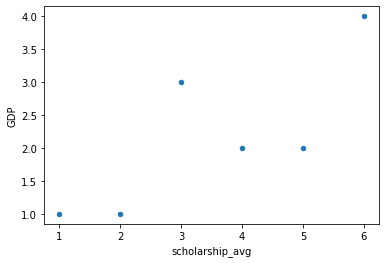

In [67]:
scholarship_with_city_GDP.plot.scatter(x='scholarship_avg',y='GDP')

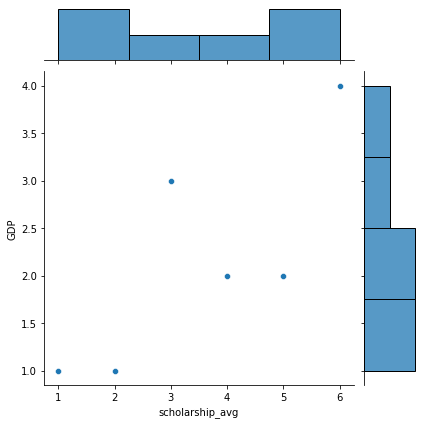

In [68]:
sns.jointplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP')

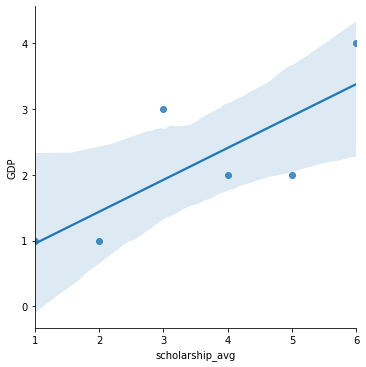

In [69]:
sns.lmplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP')

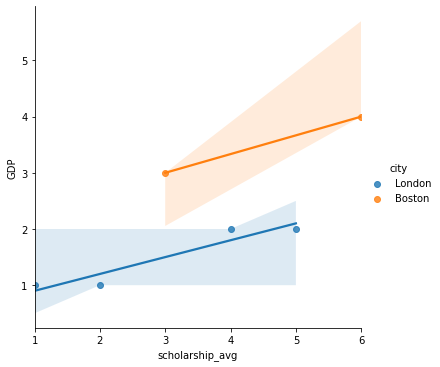

In [70]:
sns.lmplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP', hue='city')

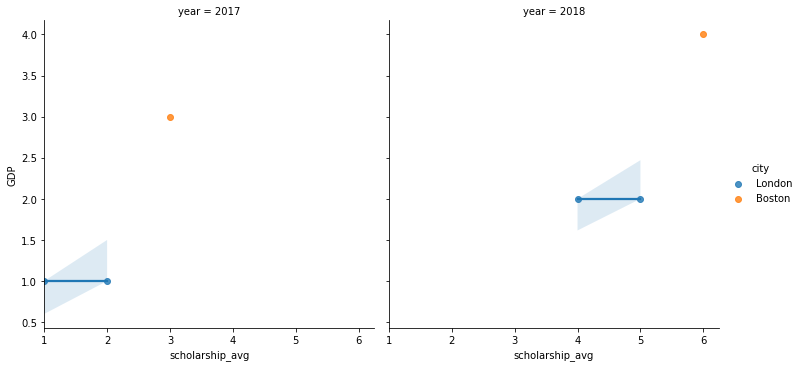

In [71]:
sns.lmplot(data=scholarship_with_city_GDP, x='scholarship_avg',y='GDP', hue='city', col='year')

In [72]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [73]:
p = figure(plot_width=600, plot_height=400)
p.scatter(x=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['GDP'],
          color='lime', alpha=0.8, legend='London',
          marker='circle', size=15)
show(p)

In [74]:
p = figure( plot_width=600, plot_height=400)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['GDP'],
          color='lime', alpha=0.8, legend='London',
          marker='circle', size=15)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['GDP'],
          color='purple', alpha=0.8, legend='Boston',
         marker='circle', size=15)
p.legend.location = "top_left"
show(p)

In [75]:

p = figure( plot_width=600, plot_height=400)
p.title.text = 'Click on legend entries to hide the corresponding lines'

p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']['GDP'],
          color='lime', alpha=0.8, legend='London',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15)
p.scatter(x= scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['scholarship_avg'],
           y=scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']['GDP'],
          color='purple', alpha=0.8, legend='Boston',
          muted_color='purple', muted_alpha=0.6,
         marker='circle', size=15)


p.legend.location = "top_left"
p.legend.click_policy="mute"#"hide"

show(p)

In [76]:

p = figure( plot_width=600, plot_height=400)
p.title.text = "Mouse over the dots"

l_df = scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='London']
source = ColumnDataSource(l_df)
p.scatter(x= 'scholarship_avg',
           y='GDP',
          color='lime', alpha=0.8, legend='London',
          muted_color='lime', muted_alpha=0.2,
          marker='circle', size=15,
         source = source)

hover = HoverTool(tooltips=[("uni", "@university"),
                            ('year', '@year')])
p.add_tools(hover)

b_df = scholarship_with_city_GDP[scholarship_with_city_GDP['city']=='Boston']
source = ColumnDataSource(b_df)
p.scatter(x= 'scholarship_avg',
           y='GDP',
          color='purple', alpha=0.8, legend='Boston',
          muted_color='purple', muted_alpha=0.2,
         marker='circle', size=15,
         source = source)


p.add_tools(hover)
p.legend.location = "top_left"
p.legend.click_policy="mute"
#p.legend.click_policy="hide"

show(p)

### 1 - exercise

Load the zipcode_dict_corrected.npy file into a dictionary. <br>
Create a list (called df_rows) from the dictionary where each element looks like ['city','zipcode']. For each city there should be a row for all the corresponding zip codes.

In [1]:
import pandas as pd
import numpy as np
zipcode_dict = np.load('zipcode_dict_corrected.npy',allow_pickle=True).item()
df_rows = []
for k,v in zipcode_dict.items():
    for vv in v:
        df_rows.append([k,vv])


### 1 - check yourself

In [2]:
if len(df_rows) == 146:
    print('Your list is correct')
else:
    print('Your list is NOT correct')

Your list is correct


### 2 - exercise

- Create a dataframe from the df_rows list, where the columns are called landmark az zipcode <br>
- Create a new column in the dataframe called zip that contains the values from the zipcode column without the ',' and converted into integer type
- Drop the zipcode column

In [31]:
zipdf = pd.DataFrame(df_rows, columns=['landmark', 'zipcode'])
zipdf['zip'] = zipdf['zipcode'].apply(lambda x: int(x.replace(',','')))
zipdf.drop(['zipcode'], axis=1, inplace = True)


### 2 - check yourself

In [5]:
from pandas.api.types import is_numeric_dtype
if is_numeric_dtype(zipdf['zip']) and len(zipdf) == 146:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 3 - exercise
Load the trip, station and weather csv-s into pandas dataframes <br>
Join them on the appropriate columns and create a final dataframe called merged_df where there is a row for each trip with the weather conditions for the corresponding day in the corresponding city (landmark)

In [6]:
trip = pd.read_csv('trip.csv')
station = pd.read_csv('station.csv')
weather = pd.read_csv('weather.csv')

merged_df = pd.merge(trip, station, how='left', left_on='Start Station', right_on='name')
merged_df = pd.merge(merged_df, zipdf, how='left', left_on='zip_code', right_on='zip')
merged_df = pd.merge(merged_df, weather, how='left', on=['date_to_join', 'landmark'])


In [7]:
merged_df.head()

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,datetime
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,no_event,286.0,2013-08-29
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,...,10.0,10.0,16.0,7.0,24.0,0.0,4.0,no_event,320.0,2013-08-29
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,...,10.0,10.0,16.0,5.0,16.0,0.0,4.0,no_event,355.0,2013-08-29
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,...,10.0,10.0,16.0,7.0,24.0,0.0,4.0,no_event,320.0,2013-08-29
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,no_event,286.0,2013-08-29


### 3 - check yourself

In [9]:
if sorted(merged_df['Events'].value_counts().tolist()) == [496, 793, 10389, 11689, 120057]:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 4 - exercise

Create a new column in the merged_df called weekend where the value is True for Saturday and Sunday and False for the other days. If you want you can create helper column that contains the name of the day first

In [43]:
#import datetime

merged_df['weekend']=pd.to_datetime(merged_df['date_to_join']).apply(
    lambda x: x.day_name()=='Saturday' or x.day_name()=='Sunday')
# Check
sorted(merged_df['weekend'].value_counts().tolist())

[22980, 121005]

### 4 - check yourself

In [44]:
if sorted(merged_df['weekend'].value_counts().tolist()) == [22980, 121005]:
    print('The weekend column is correct')
else:
    print('The weekend column is NOT correct')

The weekend column is correct


### 5 - exercise

We would like to plot the number of trips taken by Customers/Subscribers by the different weather conditions. Let's start with the Max_Temperature_F! <br>
Create a dataframe where we can find for each possible values of the Max_Temperature_F: how many trips were taken by Subscirption Type and weekend. It will be the easiest to plot if the dataframe is in long format: for each temperature value there are 4 rows: weekend - Customer, weekend - Subscriber, weekday - Customer, weekday - Subscriber. Name the columns containing the number of trips to num_trips.

In [16]:
# Your code here
toplot = merged_df.groupby(['Max_Temperature_F', 'weekend','Subscription Type']
                          ).count().reset_index().iloc[:,0:4].rename(columns={'Trip ID':'num_trips'})


In [18]:
toplot

,Max_Temperature_F,weekend,Subscription Type,num_trips
0,46.0,True,Customer,3
1,46.0,True,Subscriber,7
2,47.0,True,Customer,69
3,47.0,True,Subscriber,194
4,48.0,False,Subscriber,3
...,...,...,...,...
160,91.0,True,Subscriber,2
161,94.0,True,Customer,25
162,94.0,True,Subscriber,1
163,95.0,True,Customer,27


### 5 - check yourself

In [19]:
if len(toplot) == 165:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is correct


### 6 - exercise
Use seaborn to lmplot to plot the relationship between the max temperature and the number of trips taken by Customers/Subscribers! Draw two separate plots for weekends and weekdays next to each other!

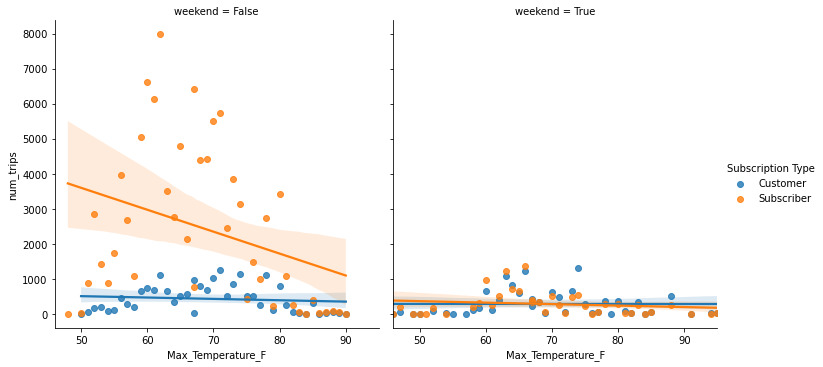

In [20]:
import seaborn as sns

sns.lmplot(data=toplot, x='Max_Temperature_F',y='num_trips', hue='Subscription Type', col='weekend')


### 7 - exercise

Use a for loop to draw similar charts for all numeric weather conditions! Write one observation about what you see on the charts! It can be about one chart or the comparison of multiple charts!

In [21]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(merged_df['Max_Temperature_F'])

True

Max_Temperature_F
Mean_Temperature_F
Min_Temperature_F
Max_Dew_Point_F
Mean_Dew_Point_F
Min_Dewpoint_F
Max_Humidity
Mean_Humidity
Min_Humidity
Max_Sea_Level_Pressure_In
Mean_Sea_Level_Pressure_In
Min_Sea_Level_Pressure_In
Max_Visibility_Miles
Mean_Visibility_Miles
Min_Visibility_Miles
Max_Wind_Speed_MPH
Mean_Wind_Speed_MPH
Max_Gust_Speed_MPH
Precipitation_In
Cloud_Cover
Wind_Dir_Degrees


C:\Users\Gyongyver\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


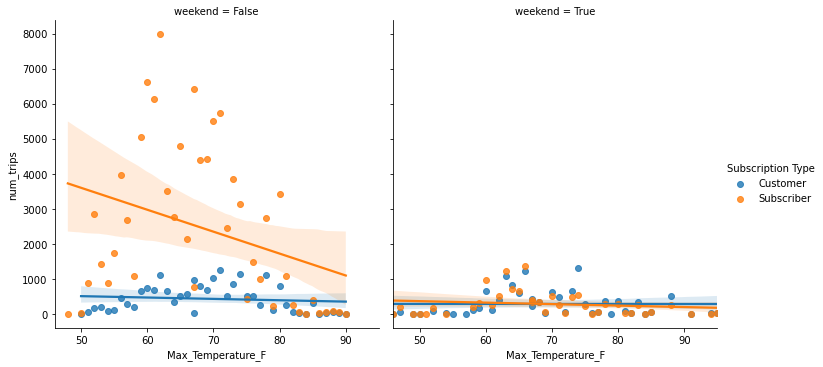

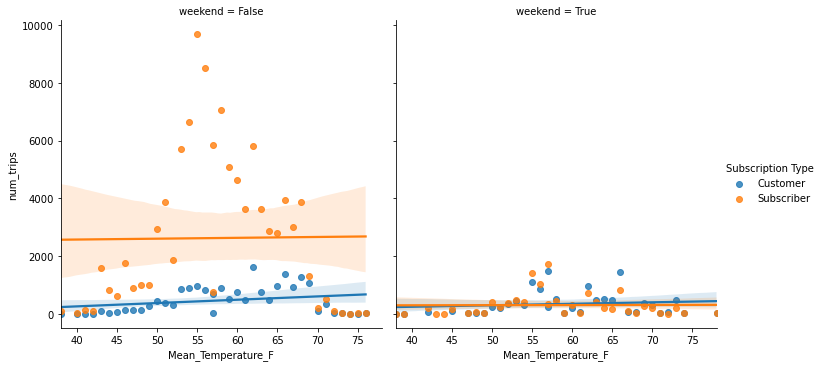

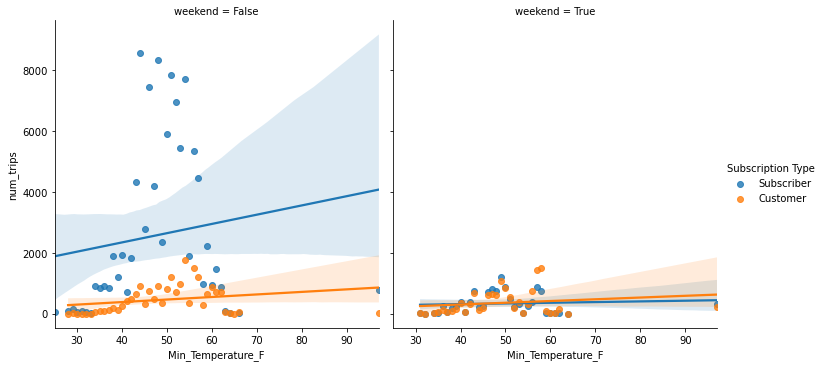

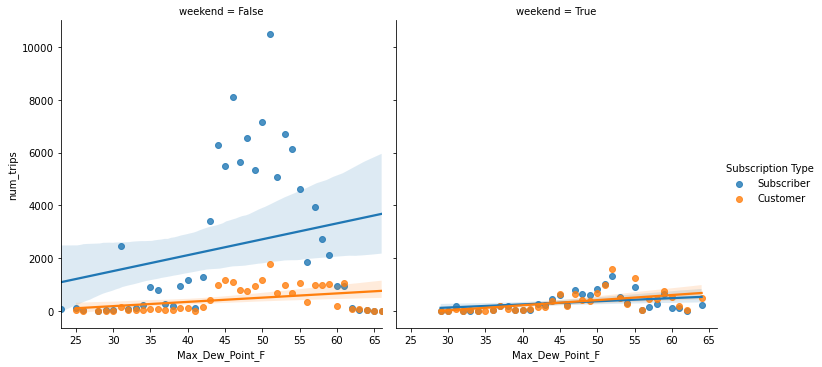

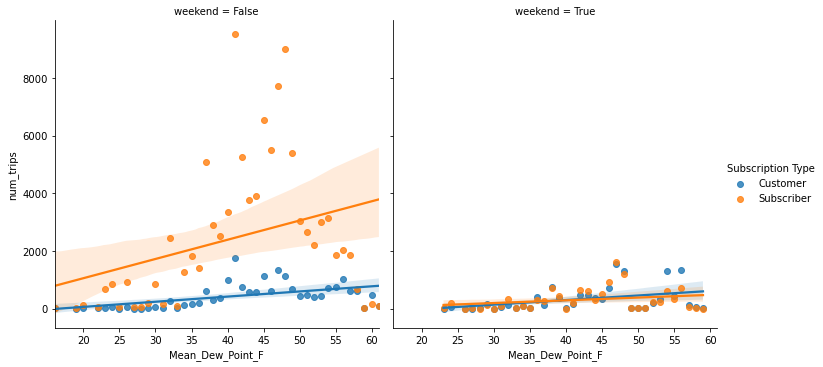

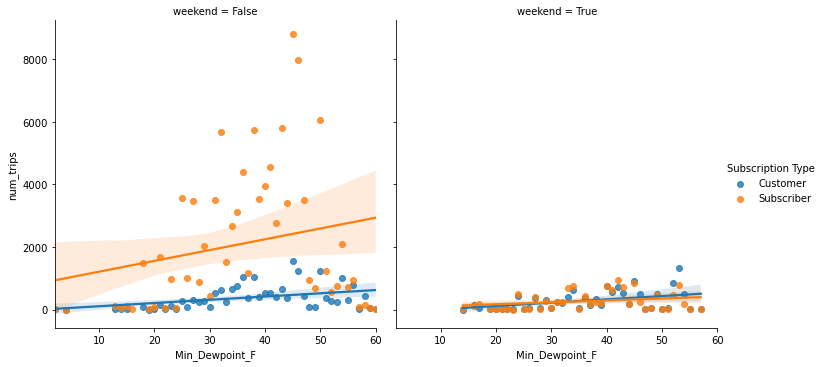

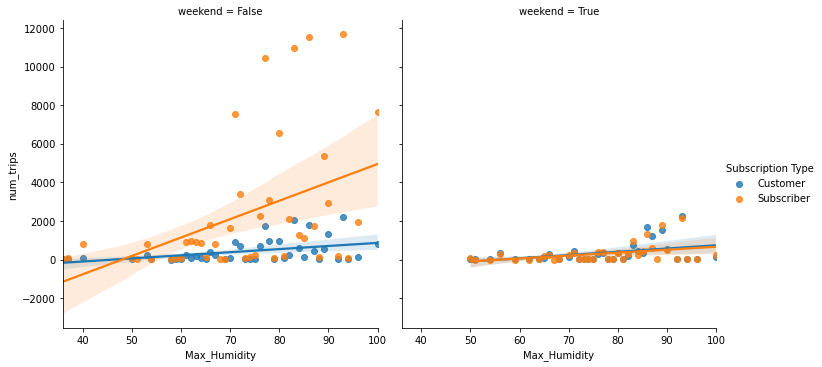

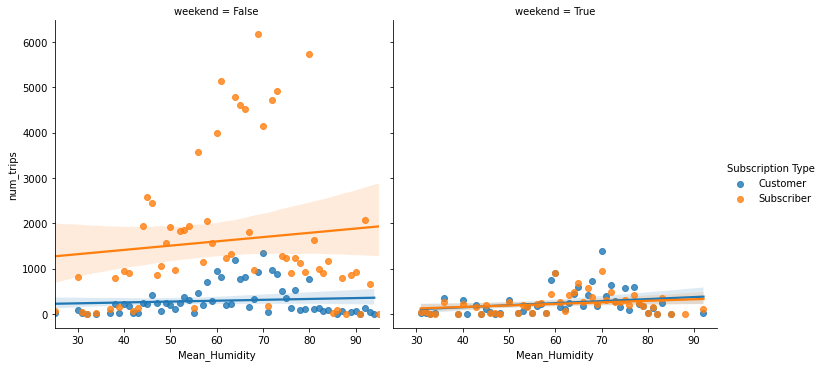

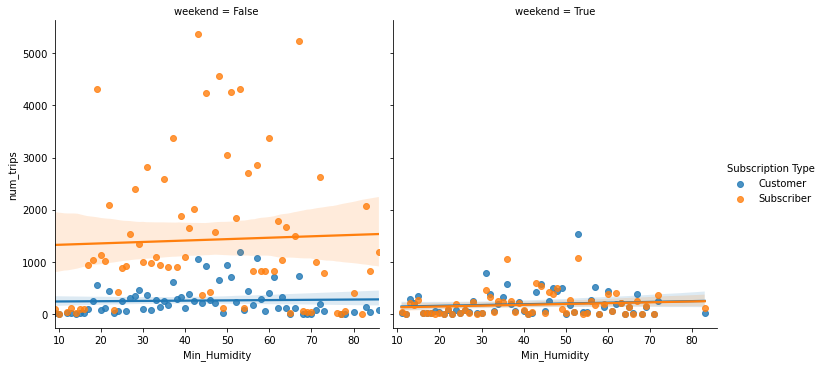

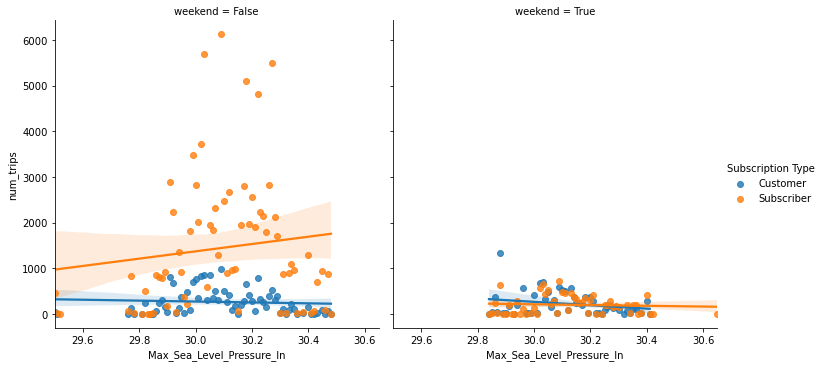

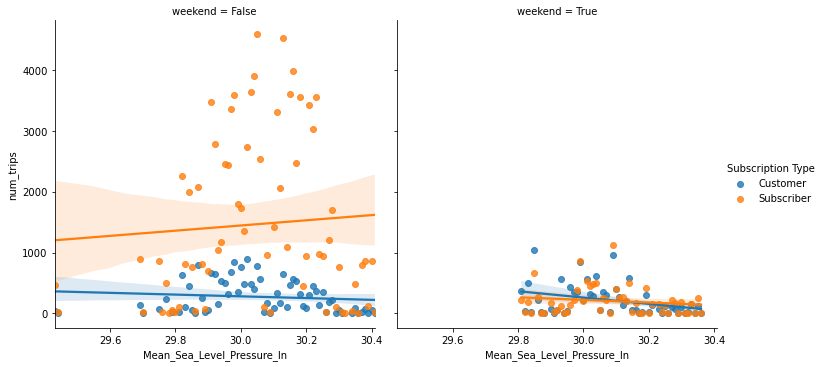

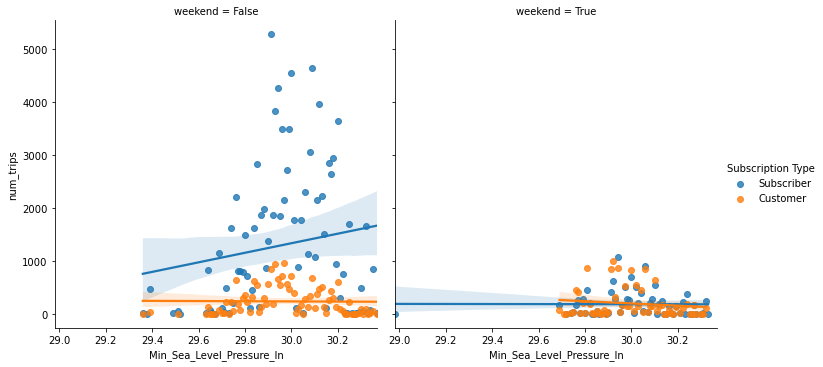

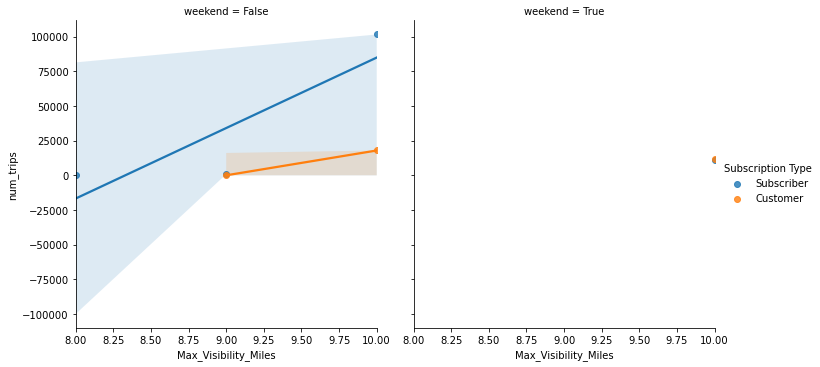

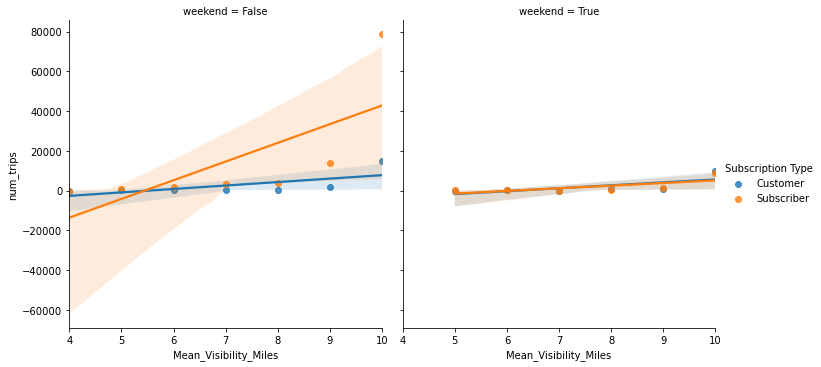

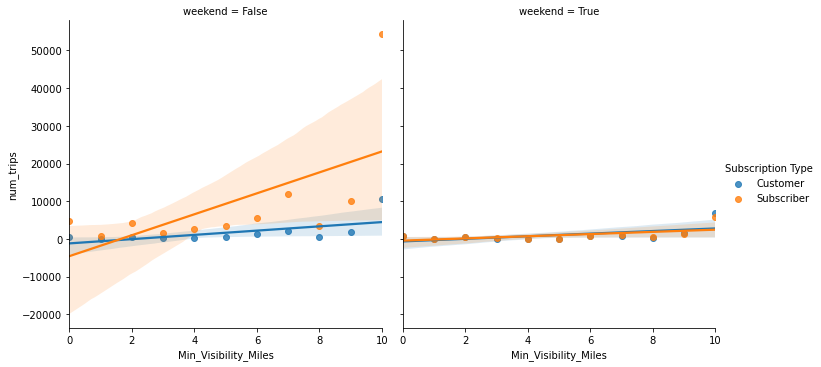

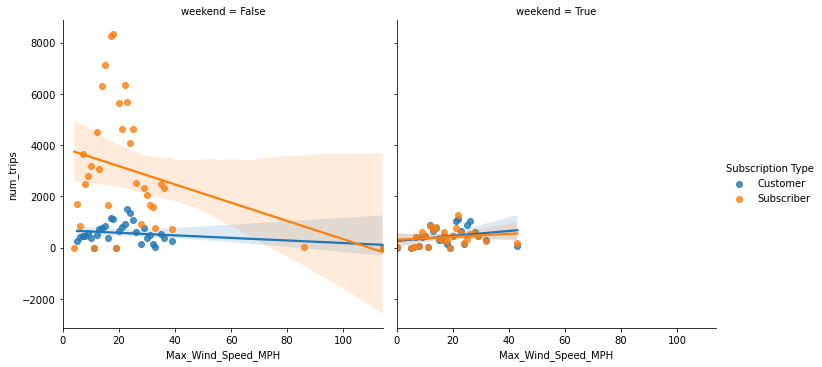

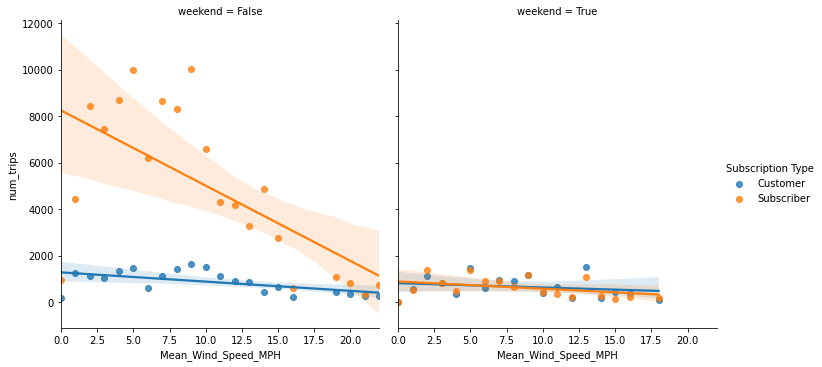

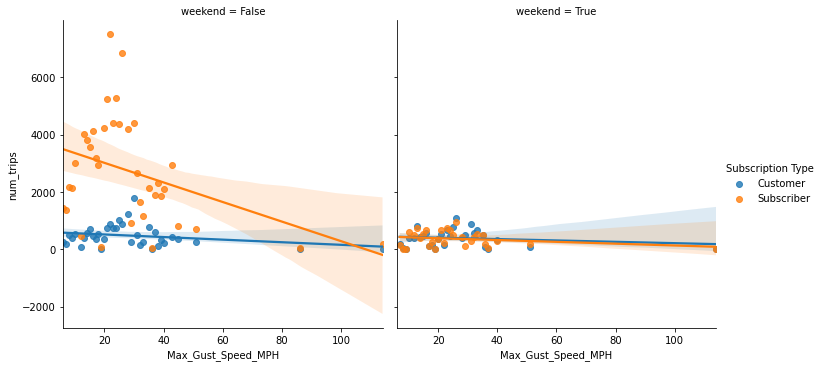

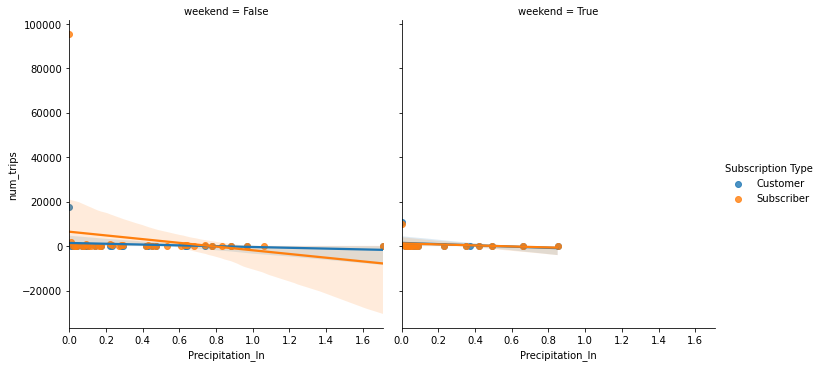

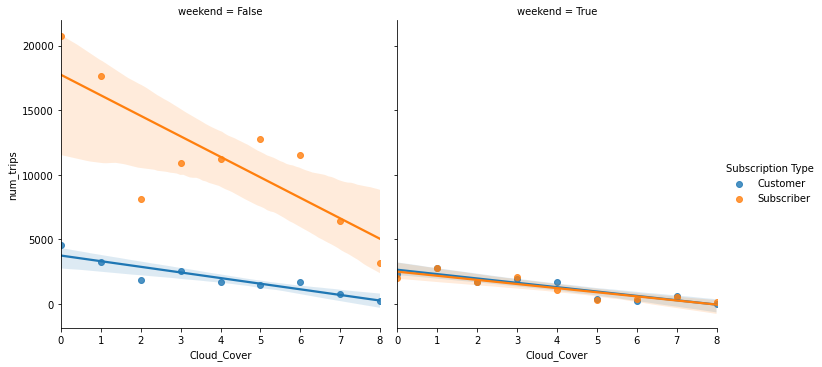

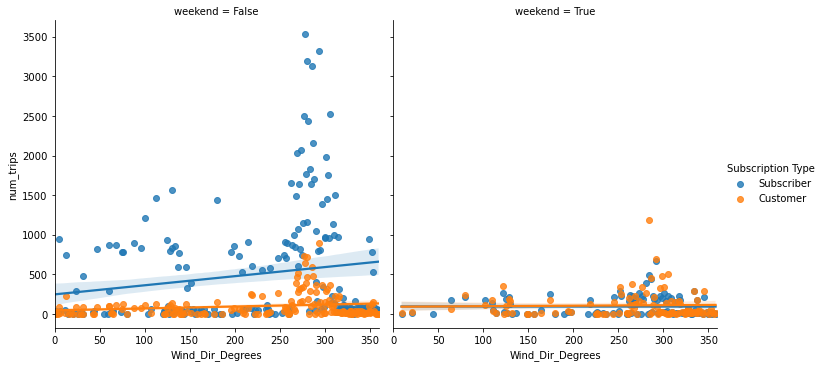

In [41]:
 for column in list(weather.columns):
    if is_numeric_dtype(merged_df[column]):
        toplot = merged_df.groupby([column, 'weekend','Subscription Type']
                          ).count().reset_index().iloc[:,0:4].rename(columns={'Trip ID':'num_trips'})
        print(column)
        sns.lmplot(data=toplot, x=column,y='num_trips', hue='Subscription Type', col='weekend')
    else:
        pass
    
        



Observation: there is big difference in the linear model between the two subscription types on weekdays for every weather condition. However, at the weekend the linear model of subscriber and customers are basicaly identical in all weather conditions. Interesting.

### Bonus exercise

Use the Bokeh library to draw an interactive plot about the data! The chart should have at least one interactive element (e.g. hover, clickable legend...)

In [45]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()


Loading BokehJS ...

In [50]:
p = figure( plot_width=600, plot_height=400)
p.scatter(x= toplot[toplot['Subscription Type']=='Customer']['Max_Temperature_F'],
           y=toplot[toplot['Subscription Type']=='Customer']['num_trips'],
          color='blue', alpha=0.8,legend='Customer',muted_alpha=0.2,
          marker='circle', size=10)

p.scatter(x= toplot[toplot['Subscription Type']=='Subscriber']['Max_Temperature_F'],
           y=toplot[toplot['Subscription Type']=='Subscriber']['num_trips'],
          color='magenta', alpha=0.8,legend='Subscriber',muted_alpha=0.2,
          marker='circle', size=10)


p.legend.location = "top_right"

#hover = HoverTool(tooltips=[("Max Temperature", "@Max_Temperature_F"),
#                            ('# of trips', '@num_trips')])
#p.add_tools(hover)
p.legend.click_policy="mute"
show(p)